# SISTEMAS DE DETECCION DE INTRUSIONES BASADO EN MODELOS DE INTELIGENCIA ARTIFICIAL EXPLICATIVA 
   
 Autor: Jose Hernandez Segura 
 Tutor: Xavier Larriva Novo 
 
 La idea de este proyecto es probar y comparar un total de 6 modelos de Machine Learning sobre el dataset CICIDS 2017 Dataset (https://www.unb.ca/cic/datasets/ids-2017.html): 
    
    
   - Support Vector Machine (SVM)
   - Decision Tree
   - Naive Bayes
   - K Means Clustering 
   - K Nearest Neighbours,
   - Random Forest
   
Primero de todo investigará y preparará el dataset, comprobando que no haya valores nulos y que todo sea correcto. A continuación se realizara una selección de las caracteristicas más importantes haciendo un filtrado. En ese punto todo estará listo para comenzar a entrenar los 6 modelos y extraer las pertinentes metricas. Finalmente se aplicará un explainer.
   

## Imports

In [55]:
# librerias requeridas para el proyecto, es posible que más abajo se incluya alguna librería extra
import warnings
warnings.filterwarnings("ignore")
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import time
import shap 
import lime
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

from sklearn.model_selection import train_test_split

In [56]:
dataset=pd.read_csv('./CICIDS2017_sampled.csv')

In [57]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min",
             "Attack",
             "Label"
            ]

In [58]:
# Assign the column names
dataset.columns = col_names

In [59]:
# 3 Different labeling options
attacks = ['Label', 'Attack']

# xs=feature vectors, ys=labels
xs = dataset.drop(attacks, axis=1)
ys = dataset[['Attack']]

x_train, x_test, y_train, y_test = train_test_split(xs,ys, train_size = 0.8, test_size = 0.2)

## Eliminamos características con valores únicos

In [60]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['Bwd_PSH_Flags',
 'Bwd_URG_Flags',
 'Fwd_Avg_Bytes_Bulk',
 'Fwd_Avg_Packets_Bulk',
 'Fwd_Avg_Bulk_Rate',
 'Bwd_Avg_Bytes_Bulk',
 'Bwd_Avg_Packets_Bulk',
 'Bwd_Avg_Bulk_Rate']

In [61]:
x_train = x_train.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
dataset_copy = xs.drop(to_drop, axis=1)

## Normalización del dataset

In [62]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_test = min_max_scaler.transform(x_test)

# All values between 0 and 1
pd.Series(x_train.flatten()).describe()

count    3.334839e+06
mean     7.220067e-02
std      2.040126e-01
min      0.000000e+00
25%      0.000000e+00
50%      2.062257e-06
75%      7.540028e-03
max      1.000000e+00
dtype: float64

## Seleccion de caracteristicas

In [63]:
features = SelectKBest(score_func=f_classif, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit_transform(x_train, y_train.Attack)

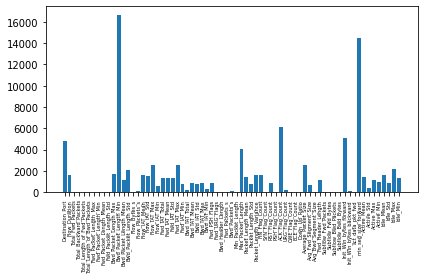

In [64]:
# plot the score associated with each feature
plt.bar([i for i in range(len(features.scores_))], features.scores_)
plt.xticks([i for i in range(len(features.scores_))], dataset_copy.columns)
plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.savefig('features.pdf', dpi=300, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto',
        backend=None)

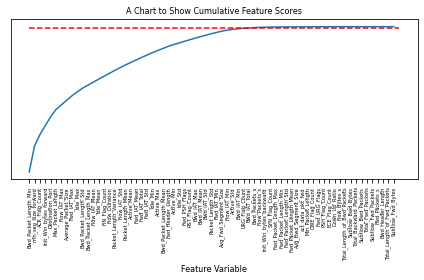

In [65]:
# sort the features by importance score
feature_importances = zip(dataset_copy.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
plt.tight_layout()
plt.savefig('cum_features.pdf', dpi=300)

In [66]:
# perform selectkbest with k=40
features = SelectKBest(score_func=f_classif, k=40)

In [67]:
fit = features.fit(x_train, y_train.Attack)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)

In [68]:
new_features = dataset_copy.columns[features.get_support(indices=True)]

In [69]:
new_features

Index(['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std',
       'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Std',
       'Packet_Length_Variance', 'FIN_Flag_Count', 'RST_Flag_Count',
       'ACK_Flag_Count', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size',
       'Fwd_Header_Length', 'Init_Win_bytes_forward', 'min_seg_size_forward',
       'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min'],
      dtype='object')

In [87]:
features = np.array(['Destination_Port', 'Flow_Duration', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_IAT_Mean', 'Flow_IAT_Std',
       'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean',
       'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total',
       'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min',
       'Fwd_PSH_Flags', 'Bwd_Packets_s', 'Min_Packet_Length',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 'ACK_Flag_Count',
       'URG_Flag_Count', 'CWE_Flag_Count', 'Avg_Fwd_Segment_Size',
       'Fwd_Header_Length', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Idle_Mean', 'Idle_Std', 'Idle_Max',
       'Idle_Min'])

In [71]:
attack = np.array(['BENIGN', 'ATTACK'])

# 1. SVC

In [22]:
classifier = LinearSVC()

## Binario

In [23]:
# fit the model
svc1 = classifier.fit(x_train, y_train)

In [24]:
svc1_score=svc1.score(x_test,y_test)
y_predict=svc1.predict(x_test)
y_true=y_test
print('Accuracy of SVM: '+ str(svc1_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of SVM: '+(str(precision)))
print('Recall of SVM: '+(str(recall)))
print('F1-score of SVM: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results


Accuracy of SVM: 0.9270048828933212
Precision of SVM: 0.9262752678485601
Recall of SVM: 0.9270048828933212
F1-score of SVM: 0.9259403476380149


,attack,precision,recall,fscore
0,BENIGN,0.904808,0.825430,0.863298
1,ATTACK,0.934592,0.966357,0.950209


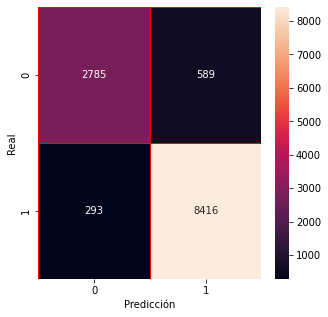

In [25]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [26]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 0.9663566425536801
Accuracy of SVM: 0.17457024303497337


# 2. Decision Tree

In [28]:
dt = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 47, min_samples_split = 3, max_features = 19, criterion = 'gini')

## Binario

In [29]:
DT=dt.fit(x_train,y_train)


In [30]:
dt_score=dt.score(x_test,y_test)
y_predict=dt.predict(x_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results


Accuracy of DT: 0.997599933791277
Precision of DT: 0.9976022857353455
Recall of DT: 0.997599933791277
F1-score of DT: 0.9976006948819675


,attack,precision,recall,fscore
0,BENIGN,0.994676,0.996740,0.995707
1,ATTACK,0.998736,0.997933,0.998334


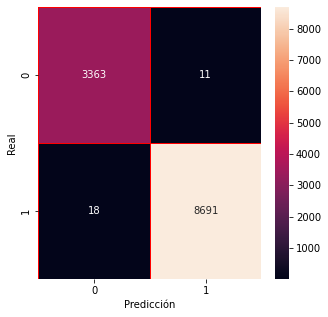

In [31]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [32]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 0.9979331725800895
Accuracy of SVM: 0.003260225251926485


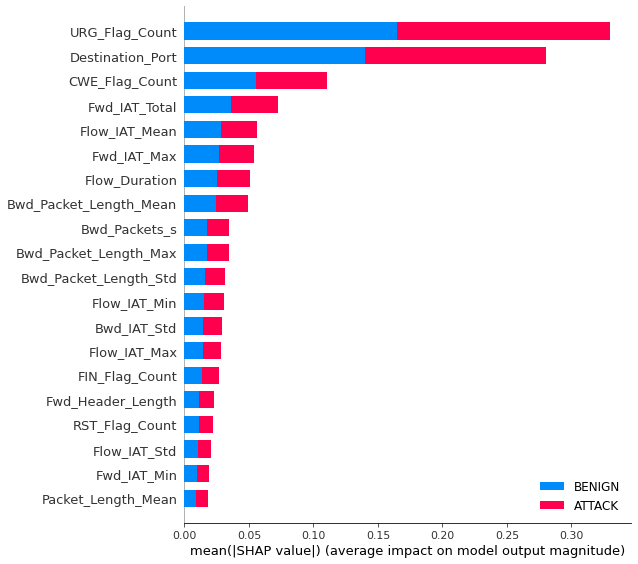

In [33]:
shap.initjs()
explainer = shap.TreeExplainer(DT)
shap_values = explainer.shap_values(x_train)

# visualize the first prediction's explanation
shap.summary_plot(shap_values, x_train, feature_names= features, class_names= attack)

In [78]:
from lime import lime_tabular
import random
explainer = lime_tabular.LimeTabularExplainer(x_train, mode="classification",
                                              feature_names=features, class_names=attack)
idx = random.randint(1, len(x_train))
explanation = explainer.explain_instance(x_train[idx], DT.predict_proba, top_labels=2)

explanation.show_in_notebook(show_table=True)

# 3. Native Bayes

In [35]:
mnb = MultinomialNB()

## Binario

In [36]:
MNB=mnb.fit(x_train,y_train)

In [37]:
mnb_score=mnb.score(x_test,y_test)
y_predict=mnb.predict(x_test)
y_true=y_test
print('Accuracy of DT: '+ str(mnb_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

Accuracy of DT: 0.8407680211867914
Precision of DT: 0.8478177916331584
Recall of DT: 0.8407680211867914
F1-score of DT: 0.8241993358170111


,attack,precision,recall,fscore
0,BENIGN,0.888532,0.491405,0.632824
1,ATTACK,0.832045,0.976117,0.898341


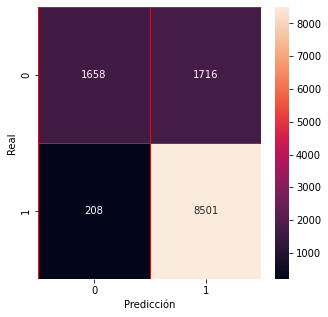

In [38]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [39]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 0.9761166609254794
Accuracy of SVM: 0.5085951393005335


# 4. K Nearest Neighbours

## Binario

In [79]:
# fit model
knn = KNeighborsClassifier(n_neighbors = 7)

In [80]:
KNN=knn.fit(x_train,y_train)

In [81]:
knn_score=knn.score(x_test,y_test)
y_predict=knn.predict(x_test)
y_true=y_test
print('Accuracy of KNN: '+ str(knn_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of KNN: '+(str(precision)))
print('Recall of KNN: '+(str(recall)))
print('F1-score of KNN: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

Accuracy of KNN: 0.9894893652238682
Precision of KNN: 0.9894887459283763
Recall of KNN: 0.9894893652238682
F1-score of KNN: 0.989461475533619


,attack,precision,recall,fscore
0,BENIGN,0.989394,0.972595,0.980922
1,ATTACK,0.989525,0.995989,0.992747


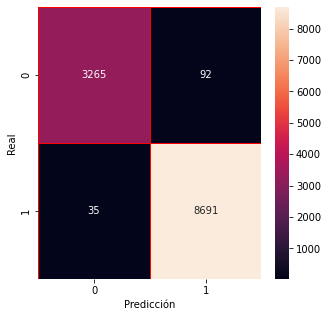

In [82]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [83]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 0.9959889983955994
Accuracy of SVM: 0.02740542150729819


In [91]:
f = lambda x: KNN.predict_proba(x)[:,1]
med = pd.DataFrame(x_train).median().values.reshape((1,pd.DataFrame(x_train).shape[1]))
explainer = shap.KernelExplainer(f, med,feature_names=features, class_names=attack)
shap_values = explainer.shap_values(pd.DataFrame(x_train).iloc[0:100,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values, pd.DataFrame(x_train).iloc[0:100,:],feature_names=features)

  0%|          | 0/100 [00:00<?, ?it/s]

In [92]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[56:57,:], pd.DataFrame(x_train).iloc[56:57,:],feature_names=features)

# 5. K Means Cluster

In [49]:
colors = ['gray', 'turquoise', 'yellow', 'red', 
          'purple', 'black', 'blue', 'green',
         'orangered', 'pink', 'cyan', 'maroon']

## Binario gráfica distribución dataset

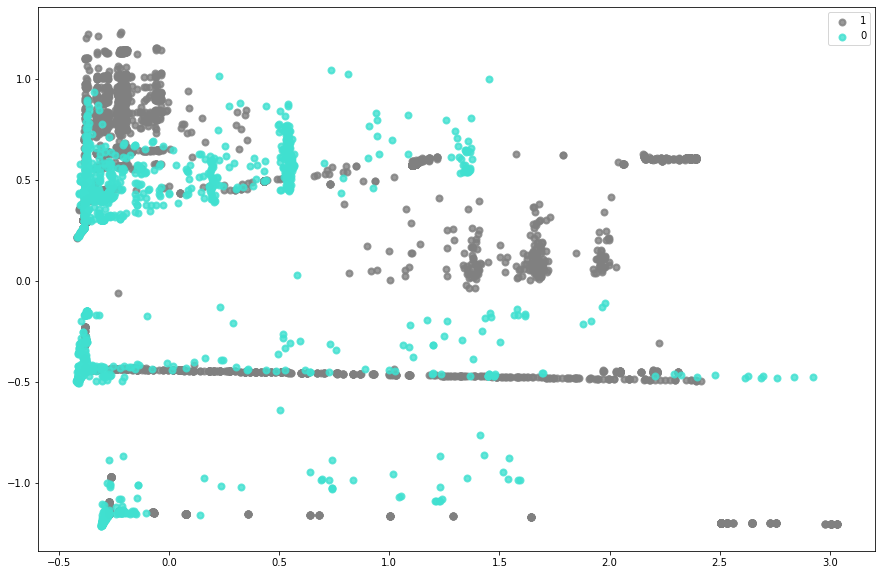

In [53]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_validate_pca_cont = pca.fit_transform(x_test)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_test.Attack.unique()):
    plt.scatter(x_validate_pca_cont[y_test.Attack == l, 0],
                x_validate_pca_cont[y_test.Attack == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

## Binario, predicción

0.17754030227661133 0.049866437911987305


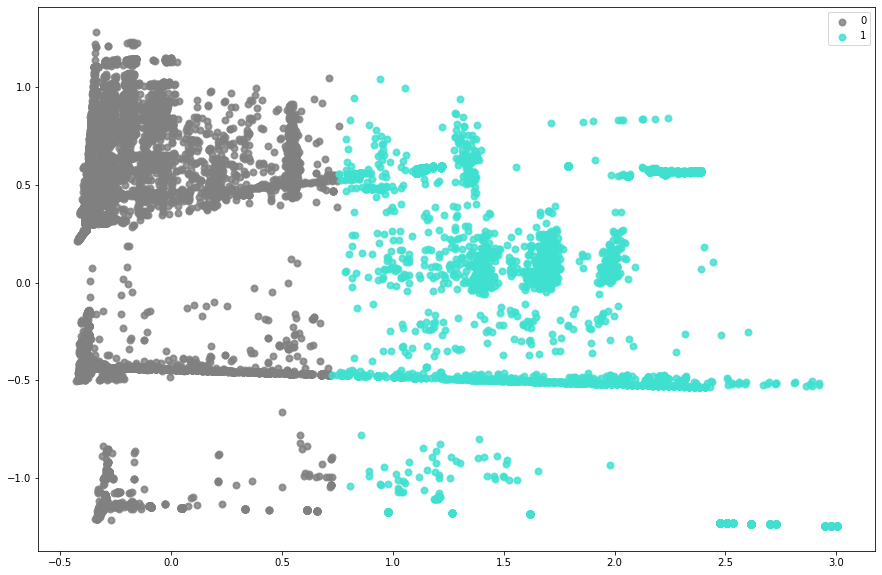

Predicted,0,1
Actual,,
0,12974,518
1,29408,5431


In [57]:
# fit
start = time.time()
kmeans = KMeans(n_clusters = 2, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_
end = time.time()
training_time = end - start

# predict
start = time.time()
y_predicted = kmeans.predict(x_train)
end = time.time()
predict_time = end  - start
print(training_time, predict_time)

# plot pca
x_validate_pca_cont = pca.fit_transform(x_train)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_validate_pca_cont[y_predicted == l, 0],
                x_validate_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

# cross tab
cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_train.Attack})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

# 6. Random Forest

In [73]:
rf =  RandomForestClassifier()

## Binario

In [74]:
RF=rf.fit(x_train, y_train.Attack)

In [75]:
rf_score=RF.score(x_test,y_test)
y_predict=rf.predict(x_test)
y_true=y_test
print('Accuracy of RF: '+ str(knn_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
precision, recall, fscore, support = score(y_test, y_predict)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

Accuracy of RF: 0.9883307125713813
Precision of RF: 0.9985106304344857
Recall of RF: 0.9985103037325168
F1-score of RF: 0.9985104335692224


,attack,precision,recall,fscore
0,BENIGN,0.997100,0.997678,0.997389
1,ATTACK,0.999074,0.998842,0.998958


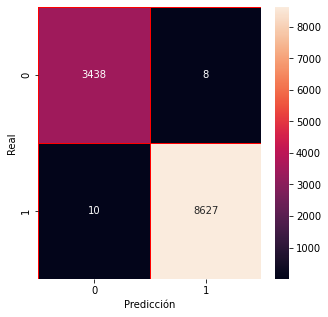

In [76]:
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [78]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
    
# Calculates tpr and fpr
tpr =  TP/(TP + FN) # sensitivity - true positive rate
fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

print('Accuracy of SVM: '+ str(tpr)) 
print('Accuracy of SVM: '+ str(fpr))

Accuracy of SVM: 0.9988421905754313
Accuracy of SVM: 0.002321532211259414
